Task 3: Let's implement a fit that finds the true values of $a$ and $b$ for the following function.

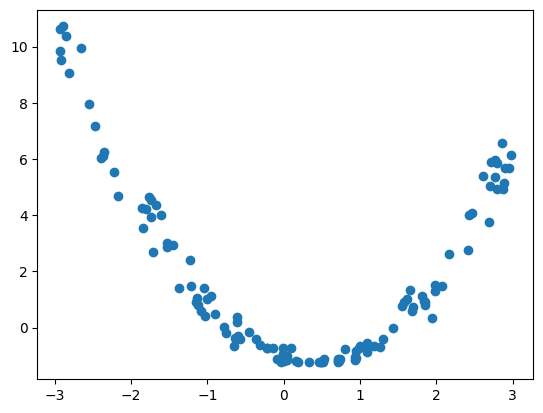

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt


rng = jax.random.key(42)

true_a, true_b = 0.2, 1.1

# function that we want to fit
@jax.jit
def function(x, a, b):
  return b*x**2 - 4*a*x - b

# generate true data with some noise
def generate_data(rng):
  x_key, noise_key = jax.random.split(rng)

  xs = jax.random.uniform(x_key, (128, 1), minval=-3, maxval=3)
  noise = jax.random.normal(noise_key, (128, 1)) * 0.15

  ys = function(x=xs + noise, a=true_a, b=true_b)
  return xs, ys


# plot data
xs, ys = generate_data(rng=rng)
plt.scatter(xs, ys)

In [12]:
# Solution
init_a = 1.0
init_b = 1.0
lr = 1e-3

@jax.jit
def function(x, a, b):
  return b*x**2 - 4*a*x - b

def loss(a,b,x,y):
    return jnp.mean((y - function(x,a,b))**2)

def update(a,b):
    grads = jax.grad(loss, argnums = (0,1))(a,b,xs,ys)
    return grads

a = init_a
b = init_b

for i in range(1000):
    grads = update(a,b)
    a -= grads[0] * lr
    b -= grads[1] * lr

print("a:{}, b:{}".format(a,b))

a:0.19006887078285217, b:1.0833139419555664


**Bonus task:** train a neural network that learn the underlying function of this dataset.

In [ ]:
# Solution
